In [ ]:
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import BatchNormalization
import datetime as dt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
df1 = pd.read_csv("Dataframe1.csv")
df2 = pd.read_csv("Dataframe2.csv")

In [ ]:
df1.tail()

,TimeInSec,UplinkSum,UplinkCount,Uplink,DownlinkSum,DownlinkCount,Downlink
500498,2019-01-31 11:15:57,0.0,0,0,0.0,0,0
500499,2019-01-31 11:15:58,0.0,0,0,0.0,0,0
500500,2019-01-31 11:15:59,0.0,0,0,0.0,0,0
500501,2019-01-31 11:16:00,837.0,4,1,445.0,5,1
500502,2019-01-31 11:16:01,6408.0,9,1,1685.0,8,1


In [ ]:
df2.tail()

,TimeInSec,UplinkSum,UplinkCount,Uplink,DownlinkSum,DownlinkCount,Downlink
480141,2019-02-17 04:45:37,0.0,0,0,0.0,0,0
480142,2019-02-17 04:45:38,0.0,0,0,0.0,0,0
480143,2019-02-17 04:45:39,0.0,0,0,0.0,0,0
480144,2019-02-17 04:45:40,280.0,7,1,2376.0,7,1
480145,2019-02-17 04:45:41,0.0,0,0,122.0,2,1


In [ ]:
(len(df1)+len(df2))*0.8

784519.2000000001

In [ ]:
784519-len(df1)

284016

In [ ]:
df1=df1[['UplinkCount','DownlinkCount']]
df2=df2[['UplinkCount','DownlinkCount']]

In [ ]:
df1=df1.groupby(df1.index//10).sum()
df2=df2.groupby(df2.index//10).sum()

In [ ]:
df1[500:700]

,UplinkCount,DownlinkCount
500,351,64
501,260,48
502,414,72
503,362,75
504,367,48
...,...,...
695,5,4
696,10,11
697,0,0
698,0,0


In [ ]:
df2

,UplinkCount,DownlinkCount
0,108,72
1,447,322
2,6,6
3,379,251
4,5,3
...,...,...
48010,8,13
48011,38,38
48012,82,64
48013,230,173


In [ ]:
len(df1)

50051

In [ ]:
len(df2)

48015

In [ ]:
(len(df1)+len(df2))*0.8

78452.8

In [ ]:
78452-len(df1)

28401

In [ ]:
DF=pd.concat([df1,df2[:28401]])

In [ ]:
DF

,UplinkCount,DownlinkCount
0,1,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
28396,0,0
28397,0,0
28398,0,0
28399,0,0


In [ ]:
X=DF[['UplinkCount']]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
train_set=DF.values
target_set=X.values
training_set_scaled = sc.fit_transform(train_set)
target_set_scaled = sc.fit_transform(target_set)

In [ ]:
DF=pd.DataFrame(training_set_scaled)
X=pd.DataFrame(target_set_scaled)

In [ ]:
df_train1=DF[0:50051]
df_train2=DF[50051:]
df_target1=X[0:50051]
df_target2=X[50051:]

In [ ]:
print(df_target2)

              0
50051  0.016656
50052  0.068939
50053  0.000925
50054  0.058452
50055  0.000771
...         ...
78447  0.000000
78448  0.000000
78449  0.000000
78450  0.000000
78451  0.000000

[28401 rows x 1 columns]


In [ ]:
train_set1=df_train1.values
target_set1=df_target1.values
train_set2=df_train2.values
target_set2=df_target2.values

In [ ]:
X_train = []
y_train = []
for i in range(6,len(train_set1)):
    X_train.append(train_set1[i-6:i,:])
    y_train.append(target_set1[i,:])

for i in range(6,len(train_set2)):
    X_train.append(train_set2[i-6:i,:])
    y_train.append(target_set2[i,:])
    
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(78440, 6, 2)
(78440, 1)


In [ ]:
def model():
    mod=Sequential()
    mod.add(LSTM(units = 100, return_sequences = False, input_shape = (X_train.shape[1], 2)))
    mod.add(Dropout(0.2))
    mod.add(Dense(32, kernel_initializer='normal', activation='relu'))
    mod.add(Dense(1, kernel_initializer='normal', activation='relu'))
    mod.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
    mod.summary()
    return mod

In [ ]:
RNN_model=model()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               41200     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                3232      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 44,465
Trainable params: 44,465
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import tensorflow as tf

callback=tf.keras.callbacks.ModelCheckpoint(filepath='./PaddedModel.h5',
                                           monitor='mean_squared_error',
                                           verbose=0,
                                           save_best_only=True,
                                           save_weights_only=False,
                                           mode='auto',
                                           save_freq='epoch')
history=RNN_model.fit(X_train, y_train,validation_split=0.25, epochs = 500, batch_size = 32,callbacks=[callback],shuffle=False)


Epoch 1/500
1839/1839 [==============================] - 14s 7ms/step - loss: 8.5612e-04 - mean_squared_error: 8.5612e-04 - val_loss: 9.9849e-04 - val_mean_squared_error: 9.9849e-04
Epoch 2/500
1839/1839 [==============================] - 12s 6ms/step - loss: 9.5568e-04 - mean_squared_error: 9.5568e-04 - val_loss: 9.9849e-04 - val_mean_squared_error: 9.9849e-04
Epoch 3/500
1839/1839 [==============================] - 12s 6ms/step - loss: 9.5568e-04 - mean_squared_error: 9.5568e-04 - val_loss: 9.9849e-04 - val_mean_squared_error: 9.9849e-04
Epoch 4/500
1839/1839 [==============================] - 12s 6ms/step - loss: 9.5568e-04 - mean_squared_error: 9.5568e-04 - val_loss: 9.9849e-04 - val_mean_squared_error: 9.9849e-04
Epoch 5/500
1839/1839 [==============================] - 12s 6ms/step - loss: 9.5568e-04 - mean_squared_error: 9.5568e-04 - val_loss: 9.9849e-04 - val_mean_squared_error: 9.9849e-04
Epoch 6/500
1839/1839 [==============================] - 12s 6ms/step - loss: 9.5568e-04 -

In [ ]:
from tensorflow import keras
RNN_model = keras.models.load_model('PaddedModel.h5')

In [ ]:
DF=df2[28401:]
X=DF[['UplinkCount']]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
train_set=DF.values
target_set=X.values
training_set_scaled = sc.fit_transform(train_set)
target_set_scaled = sc.fit_transform(target_set)

In [ ]:
X_train = []
y_train = []
for i in range(6,len(training_set_scaled)):
    X_train.append(training_set_scaled[i-6:i,:])
    y_train.append(target_set_scaled[i,:])

In [ ]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
predicted = RNN_model.predict(X_train)

In [ ]:
actual=sc.inverse_transform(y_train)
predicted=sc.inverse_transform(predicted)

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt
error=mean_squared_error(actual,predicted)
error=sqrt(error)

In [ ]:
error

102.86791661911359

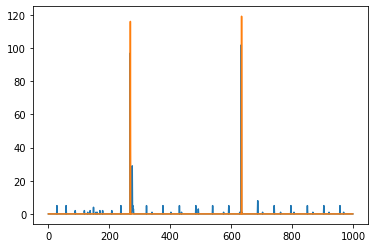

In [ ]:
import matplotlib.pyplot as plt
plt.plot(actual[1000:2000])
plt.plot(predicted[1000:2000])
#plt.plot(y_train[500:700])
#plt.plot(predicted[500:700])
plt.show()

In [ ]:
pr=predicted.flatten()
ac=y_train.flatten()
result=ac.nonzero()
pr=pr[result]
ac=ac[result]
pr=sc.inverse_transform(pr.reshape(-1,1))
ac=sc.inverse_transform(ac.reshape(-1,1))

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ac,pr)

281401.8672469933

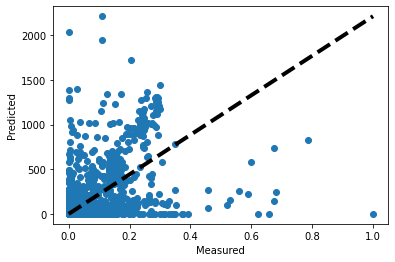

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_train, predicted)
ax.plot([y_train.min(), y_train.max()], [predicted.min(), predicted.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()


In [ ]:
df_test=df[61526:]
df_target_test=df_test[['UplinkCount']]
target_set_test=df_target_test.values
test_set=df_test.values

NameError: ignored

In [ ]:
X_test = []
y_test = []
for i in range(6,len(test_set)):
    X_test.append(test_set[i-6:i,:])
    y_test.append(target_set_test[i,:])
    
X_test, y_test = np.array(X_test), np.array(y_test)


In [ ]:
predicted = RNN_model.predict(X_test)
#predicted = sc.inverse_transform(predicted)
print(predicted)

[[164.38983  ]
 [149.70863  ]
 [104.28204  ]
 ...
 [ 15.253096 ]
 [ 15.050789 ]
 [ 13.6225605]]


In [ ]:
print(target_set_test[10:])

[[104]
 [ 96]
 [113]
 ...
 [  3]
 [  7]
 [  0]]


In [ ]:
len(target_set_test)

15381

In [ ]:
len(predicted)

15371

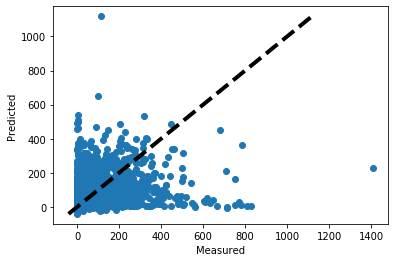

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(target_set_test[10:], predicted)
ax.plot([predicted.min(), predicted.max()], [predicted.min(), predicted.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()


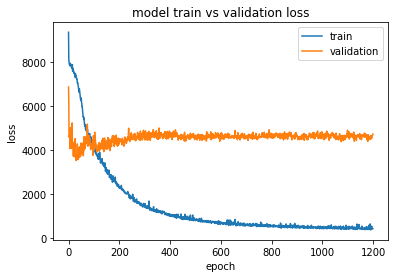

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [ ]:
predicted2=np.where(predicted<0.0,0.0,predicted)

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(target_set_test[10:],np.round(predicted2))

20.47043133172858